In [22]:
import cv2
import dlib
import matplotlib.pyplot as pt

path = "../test-dir/a/1.jpeg"
path = "../test-dir/2.jpeg"

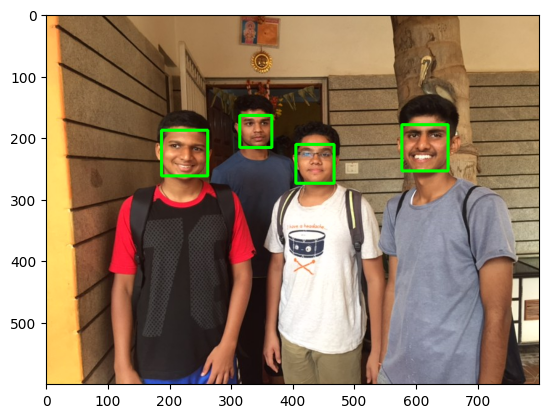

In [23]:
m1 = cv2.imread(path)
m1[:,:,[0,2]] = m1[:,:,[2,0]]

m2 = m1.copy()
d1 = dlib.get_frontal_face_detector()
d2 = dlib.face_recognition_model_v1("../models/dlib_face_recognition_resnet_model_v1.dat")

rectangles = d1(m2, 1)
for r in rectangles:
    p1, p2 = r.tl_corner(), r.br_corner()
    cv2.rectangle(m2, (p1.x, p1.y), (p2.x, p2.y), color=(0, 255, 0), thickness=4)

pt.imshow(m2);

# cooccurance matrix
# homogenity contrast
# correlation

Face's critical points:

`eye corners (4x) + nose (1x) => 5x critical points`

In [24]:
sp = dlib.shape_predictor("../models/shape_predictor_5_face_landmarks.dat")

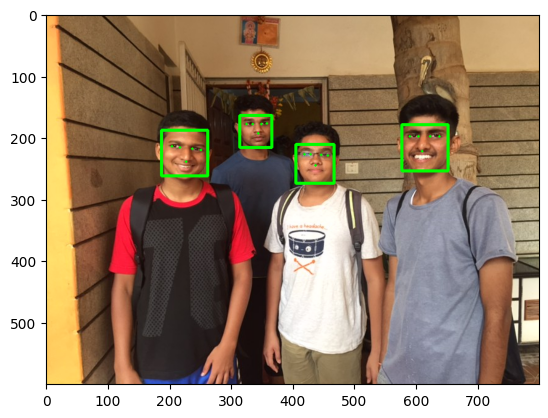

In [25]:
m2 = m1.copy()

shapes = []

rectangles = d1(m2, 1)
for r in rectangles:
    p1, p2 = r.tl_corner(), r.br_corner()
    cv2.rectangle(m2, (p1.x, p1.y), (p2.x, p2.y), color=(0, 255, 0), thickness=4)

    x = sp(m1, r)
    for i, p in enumerate(x.parts()):
        cv2.circle(m2, (p.x, p.y), radius=0, color=(0, 255, 0), thickness=4)
        # cv2.putText(m2, text=str(i+1), org=(p.x, p.y), fontFace=2, fontScale=1, color=(255, 0, 0), thickness=2)

    shapes.append((r, x))

pt.imshow(m2);

Vector Embedding facial features to a 128D array

In [26]:
ys = []

for r, x in shapes:
    ys.append(d2.compute_face_descriptor(m1, x))
    print(repr(ys[-1]))


dlib.vector([-0.133955, 0.0498705, 0.0553945, -0.0681183, -0.0791726, 0.0170665, -0.00745539, -0.101619, 0.195791, -0.117204, 0.254716, -0.017937, -0.14262, -0.0645994, -0.0154851, 0.0910497, -0.124108, -0.0718164, -0.0451243, -0.0469542, 0.0705553, -0.0213635, 0.0805758, 0.111698, -0.0977402, -0.466915, -0.13928, -0.11879, 0.0140732, -0.067447, -0.0052563, 0.115675, -0.15713, -0.0427462, -0.0377386, 0.0603567, -0.0671196, -0.0330009, 0.200345, 0.00345215, -0.158557, -0.0643385, -0.0112641, 0.253541, 0.227206, 0.044015, 0.0263978, -0.0379821, 0.10193, -0.186648, 0.00146037, 0.13019, 0.0856377, 0.0171861, 0.0584558, -0.042063, 0.0422638, 0.0169152, -0.205631, 0.00939313, -0.0215255, -0.18491, -0.0506388, -0.0330144, 0.220376, 0.175735, -0.0490315, -0.140566, 0.203066, -0.178543, -0.02902, 0.0236169, -0.179999, -0.212764, -0.252233, 0.0438819, 0.411726, 0.139981, -0.145202, 0.0576946, -0.0376544, -0.0220817, 0.11646, 0.143131, -0.0897637, -0.0188734, -0.0536224, 0.0656551, 0.146308, -0.0

In [27]:
labels = dlib.chinese_whispers_clustering(ys, 0.5)

In [28]:
labels

[0, 1, 2, 3]